In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Pandas: a package for loading data with .csv/.xlsx formats
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
6.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #helps for array operation
import pandas as pd #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data 
from sklearn.preprocessing import OneHotEncoder #helps for label one-hot encoding 
import keras #helps for CNN model construction
import tensorflow as tf #helps for CNN model construction

# Load data using pandas package
Data structure and data visualiazation


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/lab_code/mnist_train.csv')  #Load training data with the corresponding path in google drive
df2 = pd.read_csv('/content/drive/MyDrive/lab_code/mnist_test.csv')  #Load testing data with the corresponding path in google drive

In [ ]:
print (df1.shape)
print (df2.shape)

(60000, 785)
(10000, 785)


In [ ]:
X_train, y_train = df1.values[:,:-1].reshape(-1,28,28,1), df1.values[:,-1:]  #Transform data to array and reshape each sample to be an image with a shape of 1x28x28x1
X_test, y_test = df2.values[:,:-1].reshape(-1,28,28,1), df2.values[:,-1:]    

In [ ]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [ ]:
onehot = OneHotEncoder()                     #An objective for one-hot package
onehot.fit(y_train)                          #Transform labels to be the one-hot format
y_train_onehot = onehot.transform(y_train).toarray() #Transform training labels to be one-hot format
y_test_onehot = onehot.transform(y_test).toarray()   #Transform testing labels to be one-hot format

Label of this image: [5]


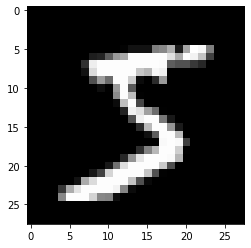

Label of this image: [0]


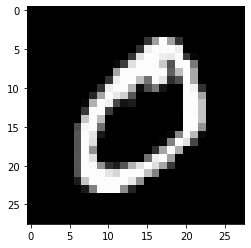

Label of this image: [3]


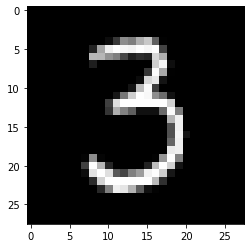

In [ ]:
#Visualization of training data
plt.imshow(X_train[0,:,:,0], cmap=plt.get_cmap('gray'))
print ('Label of this image:', y_train[0,:])
plt.show()
plt.imshow(X_train[1,:,:,0], cmap=plt.get_cmap('gray'))
print ('Label of this image:', y_train[1,:])
plt.show()
plt.imshow(X_train[50,:,:,0], cmap=plt.get_cmap('gray'))
print ('Label of this image:', y_train[50,:])
plt.show()

# Model training
We will use a famous structure named LeNet-5 for model training.
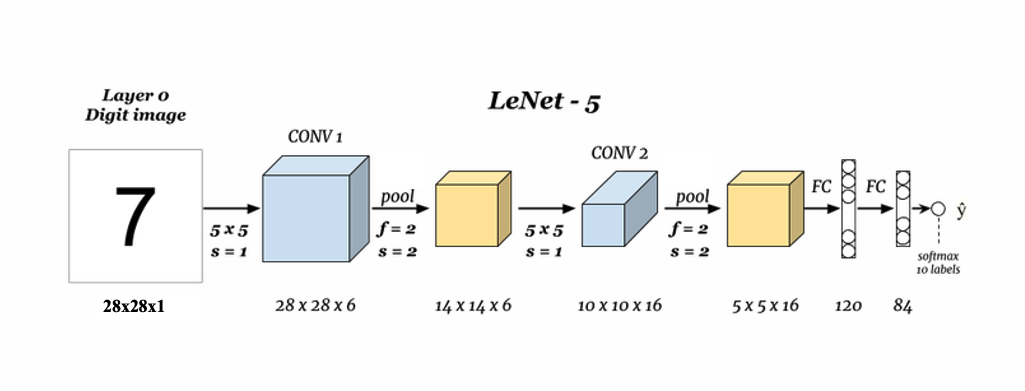

In [ ]:
# LeNet-5 structure for model training
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))  # The first convolutional layer. Input shape is 28x28x1 and activation function is Rectified Linear Unit (ReLU).\
                                                           # Kernel size and stride are set as (5,5) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (28/1) x (28/1) x 6 = 28x28x6, which is the same as the input shape.
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))  # The first maxpooling layer. The pool size and stride are both (2,2), thus the output shape is 14x14x6, where 14 = (28-2)/2 + 1.
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu')) # The second convolutional layer. The output shape is 10x10x16, where 10 = (14-5+1)/1.
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))  # The second maxpooling layer. The pool size and stride are both (2,2). The output shape is 5x5x16, where 5 = (10-2)/2+1.
model.add(keras.layers.Flatten())                          # The previous output is flattened to be a vector with a size of 1x400.
model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
model.add(keras.layers.Dense(10, activation='softmax'))    # The ouput layer. Softmax is used for probability estimation, which is suitable for classification tasks.
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-3), 'categorical_crossentropy', metrics='acc') # Model construction with a SGD optimizer, a categorical crossentropy loss function, and an accuracy metric.
model.summary() # Summary the constructed model.
model.fit(X_train, y_train_onehot, epochs = 50, batch_size = 1024, verbose = 2) # Model training with some hyperparameters


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

# Model testing

In [ ]:
prediction = model.predict(X_test)            # Prediction of the testing set
print (model.evaluate(X_test, y_test_onehot)) # Evaluation of the prediction

313/313 [==============================] - 1s 4ms/step - loss: 0.1439 - acc: 0.9565
[0.14386671781539917, 0.9564999938011169]


Prediction of this image: 7


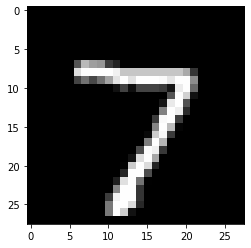

Prediction of this image: 2


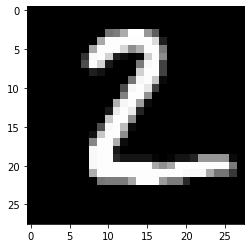

Prediction of this image: 6


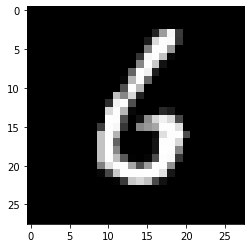

In [ ]:
#Visualization of testing data
plt.imshow(X_test[0,:,:,0], cmap=plt.get_cmap('gray'))
print ('Prediction of this image:', np.argmax(prediction[0,:]))
plt.show()
plt.imshow(X_test[1,:,:,0], cmap=plt.get_cmap('gray'))
print ('Prediction of this image:', np.argmax(prediction[1,:]))
plt.show()
plt.imshow(X_test[50,:,:,0], cmap=plt.get_cmap('gray'))
print ('Prediction of this image:', np.argmax(prediction[50,:]))
plt.show()